In [8]:
import matplotlib as mat
import matplotlib.pyplot as plt
import math
import numpy as np
import networkx as nx

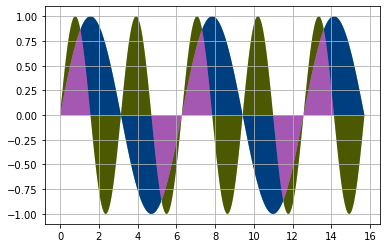

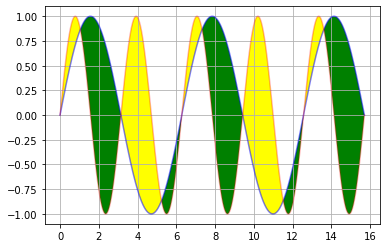

([], [])

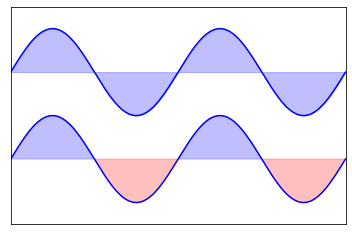

In [4]:

  
x= np.linspace(0,5*np.pi, 1000)
  
y1 = np.sin(x)
y2 = np.sin(2*x)
  
#plt.plot(x,y1)
#plt.plot(x,y2)
  
plt.fill(x,y1,'b',alpha=0.5)
plt.fill(x,y2,'r',alpha=0.3)
  
plt.fill_between(x,y1,y2,facecolor='green')
plt.grid(True)
  
plt.show()
  
#########################################################
plt.plot(x,y1,'b',alpha=0.5)
plt.plot(x,y2,'r',alpha=0.3)
#添加条件
#如果数据点比较少的情况下，会有缝隙出现，使用interpolate可以填充缝隙
plt.fill_between(x,y1,y2,where=y1>=y2,facecolor='green',interpolate=True)
plt.fill_between(x,y1,y2,where=y2>y1,facecolor='yellow',interpolate=True)
plt.grid(True)
  
plt.show()
###########################################################
  
n = 256
X = np.linspace(-np.pi, np.pi, n, endpoint=True)
Y = np.sin(2 * X)
  
  
plt.plot(X, Y + 1, color='blue', alpha=1.00)
plt.fill_between(X, 1, Y + 1, color='blue', alpha=.25)
  
plt.plot(X, Y - 1, color='blue', alpha=1.00)
plt.fill_between(X, -1, Y - 1, (Y - 1) > -1, color='blue', alpha=.25)
plt.fill_between(X, -1, Y - 1, (Y - 1) < -1, color='red', alpha=.25)
  
plt.xlim(-np.pi, np.pi)
plt.xticks(())
plt.ylim(-2.5, 2.5)
plt.yticks(())

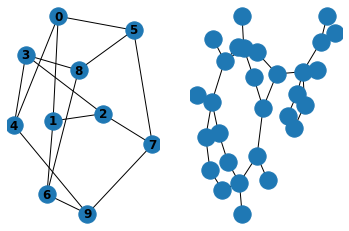

In [109]:
Gp = nx.petersen_graph()
plt.subplot(1,2,1)
nx.draw(Gp, with_labels=True, font_weight='bold')
plt.subplot(122)
tmp = edges.extend(newedge)
#nx.draw_networkx(Gp,node_color=('r', 'k', 'm', 'b', 'r', 'k','m','b','b','r'))
#nx.draw_shell(Gp, nlist=tmp)
nx.draw(G)

[(0, 17), (2, 3), (2, 17), (2, 14), (2, 13), (2, 23), (3, 2), (3, 28), (4, 23), (4, 22), (4, 8), (5, 6), (5, 23), (5, 24), (6, 5), (6, 22), (6, 12), (6, 19), (7, 29), (7, 15), (7, 25), (7, 12), (8, 4), (8, 9), (8, 18), (9, 8), (10, 18), (11, 17), (12, 6), (12, 20), (12, 7), (12, 24), (13, 26), (13, 2), (14, 2), (15, 7), (16, 25), (16, 18), (17, 2), (17, 11), (17, 0), (18, 10), (18, 16), (18, 8), (18, 27), (19, 6), (20, 12), (21, 27), (21, 29), (22, 4), (22, 6), (23, 4), (23, 2), (23, 5), (24, 12), (24, 5), (25, 7), (25, 16), (26, 13), (26, 28), (27, 18), (27, 21), (28, 26), (28, 3), (29, 7), (29, 21)] [4, 1, 3, 4, 1, 3, 2, 2, 3, 3, 3, 1, 4, 3, 4, 3, 2, 4, 0, 0, 1, 0, 2, 2, 4, 3, 3, 1, 0] 66 29
0 => blue; 1 => m; 2 => red; 3 => m; 4 => blue; 5 => red; 6 => m; 7 => gray; 8 => gray; 9 => m; 10 => m; 11 => m; 12 => red; 13 => blue; 14 => m; 15 => blue; 16 => m; 17 => gray; 18 => blue; 19 => green; 20 => green; 21 => red; 22 => green; 23 => gray; 24 => gray; 25 => blue; 26 => m; 27 => m; 28

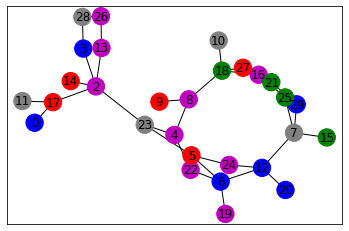

In [124]:
def delta(idx, alist):
    cnt = 0
    for i in alist:
        if idx >= i:
            cnt += 1
    return cnt

def gett(alist, clrs_list):
    """转换成两两点对， 我们删去没有邻接点的节点"""
    result = []
    toberm = []

    for index, linked in enumerate(alist):
        if len(linked) != 0:
            for node_index in linked:
                result.append((index, node_index))
        else:
            toberm.append(index)
    """前面得到一个全部节点非空的列表， 以及那些空列表的index,现在去掉那些index对应的点的颜色"""
    newlist = [value for idx,value in enumerate(clrs_list) if idx not in toberm]
    return result, newlist

colors = ('green', 'red', 'gray', 'm', 'blue')
tmp = [[17], [], [3, 17, 14, 13, 23], [2, 28], [23, 22, 8], [6, 23, 24], [5, 22, 12, 19], [29, 15, 25, 12], [4, 9, 18], [8], [18], [17], [6, 20, 7, 24], [26, 2], [2], [7], [25, 18], [2, 11, 0], [10, 16, 8, 27], [6], [12], [27, 29], [4, 6], [4, 2, 5], [12, 5], [7, 16], [13, 28], [18, 21], [26, 3], [7, 21]]
all_colors = [4, 3, 1, 3, 4, 1, 3, 2, 2, 3, 3, 3, 1, 4, 3, 4, 3, 2, 4, 0, 0, 1, 0, 2, 2, 4, 3, 3, 1, 0]

gets, color_codes = gett(tmp, all_colors)
print(gets, color_codes, len(gets), len(color_codes), end='\n')

G = nx.Graph()
G.add_edges_from(gets)
color_list = [colors[clr_code] for clr_code in color_codes]

for idx, clr in enumerate(all_colors):
    print(idx,"=>", colors[clr], end="; ")
print("="*20, end='\n')
for idx, clr in enumerate(color_codes):
    print(idx,"=>", colors[clr], end="; ")
print("="*20, end='\n')
for idx, clr in enumerate(color_list):
    print(idx, "=>", clr, end="; ")
nx.draw_networkx(G, node_color=color_list)

In [112]:
ttt = [[1,2,3], [2,3,4,5], [1,2]]

pairs, colors = 

idx=0, value=[1, 2, 3]
(0, [1, 2, 3])
idx=1, value=[2, 3, 4, 5]
(1, [2, 3, 4, 5])
idx=2, value=[1, 2]
(2, [1, 2])


[(0, 12), (1, 9), (1, 18), (1, 14), (1, 12), (2, 18), (2, 13), (2, 10), (2, 7), (3, 8), (3, 18), (4, 6), (4, 13), (4, 11), (4, 15), (5, 13), (5, 12), (5, 11), (6, 4), (6, 17), (6, 12), (6, 8), (7, 16), (7, 2), (7, 8), (8, 3), (8, 7), (8, 6), (8, 10), (9, 1), (9, 12), (9, 6), (10, 2), (10, 8), (10, 18), (10, 11), (11, 8), (11, 5), (11, 4), (11, 10), (12, 0), (12, 5), (12, 6), (12, 9), (13, 2), (13, 4), (13, 5), (13, 16), (14, 1), (14, 13), (14, 16), (14, 11), (15, 12), (15, 2), (15, 4), (16, 7), (16, 13), (16, 14), (16, 17), (17, 6), (17, 16), (17, 1), (17, 2), (18, 1), (18, 2), (18, 3), (18, 10), (19, 18), (19, 6), (19, 2)] [4, 2, 4, 2, 1, 2, 2, 2, 1, 1, 3, 0, 3, 3, 1, 0, 4, 1, 1, 0] 70 20

[(0, 12), (1, 9), (1, 18), (1, 14), (1, 12), (2, 18), (2, 13), (2, 10), (2, 7), (3, 8), (3, 18), (4, 6), (4, 13), (4, 11), (4, 15), (5, 13), (5, 12), (5, 11), (6, 4), (6, 17), (6, 12), (6, 8), (7, 16), (7, 2), (7, 8), (8, 3), (8, 7), (8, 6), (8, 10), (9, 1), (9, 12), (9, 6), (10, 2), (10, 8), (10, 1

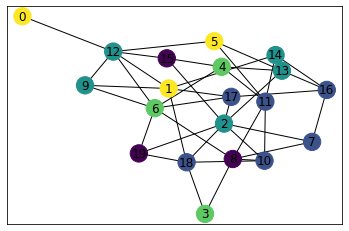

In [139]:
def clear0(alist, clrs_list):
    """
    转换成两两点对， 我们删去没有邻接点的节点
    第一个循环得到一个全部节点非空的列表， 以及那些空列表的index,现在去掉那些index对应的点的颜色
    """
    result = []
    toberm = []

    for index, linked in enumerate(alist):
        if len(linked) != 0:
            for linked_index in linked:
                result.append((index, linked_index))
        
    
    newcolors = [clr for idx,clr in enumerate(clrs_list) if idx not in toberm]
    return result, newcolors

colors = ('green', 'red', 'gray', 'm', 'blue')
tmp = [[12], [9, 18, 14, 12], [18, 13, 10, 7], [8, 18], [6, 13, 11, 15], [13, 12, 11], [4, 17, 12, 8], [16, 2, 8], [3, 7, 6, 10], [1, 12, 6], [2, 8, 18, 11], [8, 5, 4, 10], [0, 5, 6, 9], [2, 4, 5, 16], [1, 13, 16, 11], [12, 2, 4], [7, 13, 14, 17], [6, 16, 1, 2], [1, 2, 3, 10], [18, 6, 2]]
all_colors = [4, 2, 4, 2, 1, 2, 2, 2, 1, 1, 3, 0, 3, 3, 1, 0, 4, 1, 1, 0]

gets, color_codes = gett(tmp, all_colors)
print(gets, color_codes, len(gets), len(color_codes), end='\n\n')

gets, color_codes = clear0(tmp, all_colors)
print(gets, color_codes, len(gets), len(color_codes), end='\n')

G = nx.Graph()
G.add_edges_from(gets)
color_list = [colors[clr_code] for clr_code in color_codes]

for idx, clr in enumerate(all_colors):
    print(idx,"=>", colors[clr], end="; ")
print("="*20, end='\n')

for idx, clr in enumerate(color_list):
    print(idx, "=>", clr, end="; ") 
nx.draw_networkx(G, node_color=color_codes)


{3: {}, 2: {}}
{4: {}, 3: {}}


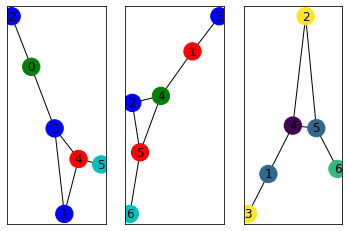

In [165]:
origin = [(0, 3), (0, 2), (1, 3), (1, 4), (2, 0), (3, 0), (3, 1), (3, 4), (4, 3), (4, 1), (4, 5), (5, 4)]
rm_repeat = [(0, 3), (0, 2), (1, 3), (1, 4), (3, 1), (3, 4), (4, 1), (4, 5)]
rm_repeat = [(i+1, j+1) for i,j in rm_repeat]
all_colors = [2, 1, 4, 4, 2, 3]
mapping = {1:'g', 0:'b', 3:'b', 5:'b', 2:'r', 4:'c'}
sorted_clrs = list(mapping.values())
G1 = nx.Graph()
G1.add_edges_from(origin)
G2 = nx.Graph()
G2.add_edges_from(rm_repeat)
print(G1[0])
print(G2[1])
G1.node_color = 'c'
plt.subplot(1,3,1)
nx.draw_networkx(G1, node_color=sorted_clrs)
plt.subplot(1,3,2)
nx.draw_networkx(G2, node_color=['r', 'g', 'b', 'b', 'r', 'c'])
plt.subplot(1,3,3)
nx.draw_networkx(G2, node_color=all_colors)

{41: 0, 96: 1, 69: 1, 40: 1, 110: 1, 175: 1, 143: 1, 48: 1, 115: 1, 180: 1, 92: 1, 127: 1, 128: 2, 129: 2, 10: 2, 11: 2, 13: 2, 15: 2, 146: 2, 147: 2, 149: 2, 166: 2, 44: 2, 45: 2, 51: 2, 63: 2, 66: 2, 75: 2, 76: 2, 99: 2, 111: 2, 114: 2, 124: 2, 3: 3, 9: 3, 145: 3, 19: 3, 150: 3, 151: 3, 26: 3, 156: 3, 29: 3, 30: 3, 34: 3, 36: 3, 165: 3, 168: 3, 177: 3, 55: 3, 185: 3, 59: 3, 192: 3, 195: 3, 196: 3, 89: 3, 90: 3, 98: 3, 104: 3, 105: 3, 2: 4, 5: 4, 18: 4, 21: 4, 27: 4, 28: 4, 33: 4, 35: 4, 43: 4, 46: 4, 50: 4, 52: 4, 53: 4, 62: 4, 67: 4, 73: 4, 77: 4, 80: 4, 82: 4, 83: 4, 88: 4, 103: 4, 113: 4, 117: 4, 118: 4, 123: 4, 130: 4, 135: 4, 148: 4, 153: 4, 155: 4, 167: 4, 178: 4, 182: 4, 190: 4, 197: 4, 0: 5, 7: 5, 8: 5, 12: 5, 16: 5, 17: 5, 23: 5, 24: 5, 31: 5, 47: 5, 49: 5, 58: 5, 60: 5, 61: 5, 70: 5, 71: 5, 72: 5, 74: 5, 85: 5, 86: 5, 91: 5, 93: 5, 94: 5, 95: 5, 101: 5, 102: 5, 107: 5, 120: 5, 121: 5, 122: 5, 126: 5, 136: 5, 139: 5, 144: 5, 152: 5, 157: 5, 159: 5, 163: 5, 169: 5, 170: 5, 17

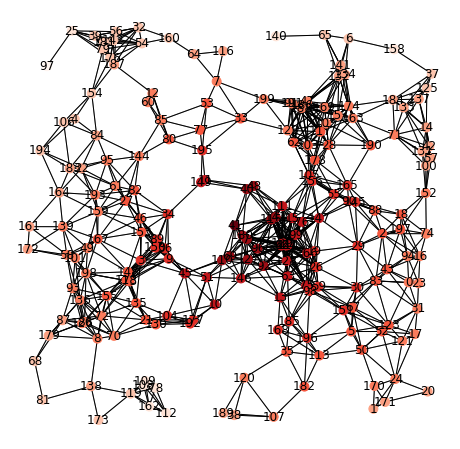

In [157]:
G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center

p = dict(nx.single_source_shortest_path_length(G, ncenter))
colors = p.values()
print(p)
print(f"{colors}")
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

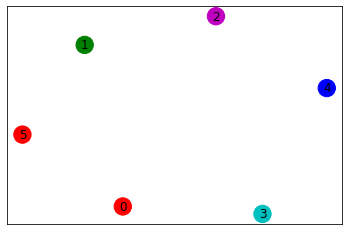

In [193]:
G = nx.Graph()
#G.add_edges_from([(0, 5), (0, 2), (1, 2), (1, 3), (2, 3), (2, 5), (3, 4), (3, 5), (4, 5), (5, 3)])
G.add_nodes_from((0, 1, 2, 3, 4, 5))
G.node_dict_factory({0:1, 1:2})
colors = ['r','g', 'm', 'c', 'b', 'r']
nx.draw_networkx(G, node_color=colors)